#Libraries and data

In [ ]:
%cd /content/drive/MyDrive/Data Mining for Business in Python/7. Random Forest and Driver Importance

/content/drive/MyDrive/Data Mining for Business in Python 2021/7. Random Forest and Driver Importance


In [ ]:
#import libraries
import pandas as pd

In [ ]:
#import the data
data = pd.read_csv("bank-full.csv", sep = ";")
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


# Data Prep

In [ ]:
#transform the string variables
dataset = pd.get_dummies(data = data,
                         drop_first = True)
dataset.head()

In [ ]:
#isolate X and Y
y = dataset.iloc[:,-1]
X = dataset.iloc[:, :-1]
X.head(1)

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,default_yes,housing_yes,loan_yes,contact_telephone,contact_unknown,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143,5,261,1,-1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1


In [ ]:
#split into training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2,
                                                    random_state = 1502,
                                                    stratify = y)
X_train.head()

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,default_yes,housing_yes,loan_yes,contact_telephone,contact_unknown,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
6276,31,66,27,121,1,-1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
2876,48,427,14,201,1,-1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
39212,33,139,18,732,2,291,5,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
40781,23,0,10,213,1,-1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
7551,37,1255,30,224,2,-1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1


#Random forest

In [ ]:
#RF
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators = 300,
                               random_state = 1502)
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=1502,
                       verbose=0, warm_start=False)

In [ ]:
#Predictions
predictions = model.predict(X_test)
predictions[:20]

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=uint8)

In [ ]:
#checkin dataset balance
y_test.mean()

0.11699657193409267

#Confusion Matrix

In [ ]:
#Confusion Matrix
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95      7985
           1       0.67      0.40      0.50      1058

    accuracy                           0.91      9043
   macro avg       0.80      0.68      0.72      9043
weighted avg       0.89      0.91      0.90      9043



#Feature Importance

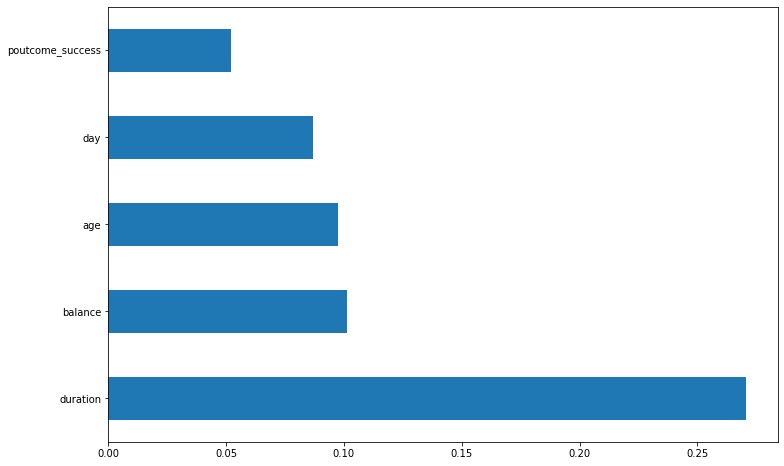

In [ ]:
#Feature Importance
importance = pd.Series(model.feature_importances_,
                       index = X_train.columns.values)
importance.nlargest(5).plot(kind = 'barh',
                            figsize = (12, 8))